# Unsupervised Machine Learning Final Assignment

https://www.coursera.org/learn/ibm-unsupervised-machine-learning/lecture/Hovyw/curse-of-dimensionality-notebook-part-4
https://www.coursera.org/learn/machine-learning-for-customer-segmentation/home/week/1

In [107]:
pwd

'C:\\Users\\K C Wong\\OneDrive\\Documents\\E-learning\\Coursera\\PROF CERT - IBM ML\\4\\Unsupervised Machine Learning\\Final Project\\Credit Card Dataset for Clustering'

In [108]:
!pip install pandas-profiling
!pip install plotly

import pandas_profiling as pp
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
matplotlib.use( 'tkagg' )

In [109]:
#pip install pycaret

from pycaret.clustering import *
'''
from pycaret.datasets import get_data
get_data('index')
'''

"\nfrom pycaret.datasets import get_data\nget_data('index')\n"

In [110]:
#https://www.kaggle.com/questions-and-answers/118932

pd.options.display.max_rows
# Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

pd.options.display.max_columns
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [111]:
cc_df=pd.read_csv("archive/CC GENERAL.csv")

In [112]:
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [113]:
cc_df[cc_df.columns[:7]].head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000


In [114]:
cc_df[cc_df.columns[7:11]].head()

,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY
0,0.166667,0.000000,0.083333,0.000000
1,0.000000,0.000000,0.000000,0.250000
2,1.000000,1.000000,0.000000,0.000000
3,0.083333,0.083333,0.000000,0.083333
4,0.083333,0.083333,0.000000,0.000000


In [115]:
cc_df[cc_df.columns[11:]].head()

,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,2,1000.0,201.802084,139.509787,0.000000,12
1,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1,1,7500.0,0.000000,NaN,0.000000,12
4,0,1,1200.0,678.334763,244.791237,0.000000,12


In [116]:
cc_df.shape

(8950, 18)

In [117]:
cc_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [118]:
# https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = cc_df[cc_df.duplicated()]

print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []


In [119]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [120]:
df_uniques = pd.DataFrame([[i, len(cc_df[i].unique())] for i in cc_df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
CUST_ID,8950
BALANCE,8871
BALANCE_FREQUENCY,43
PURCHASES,6203
ONEOFF_PURCHASES,4014
INSTALLMENTS_PURCHASES,4452
CASH_ADVANCE,4323
PURCHASES_FREQUENCY,47
ONEOFF_PURCHASES_FREQUENCY,47


In [121]:
cc_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [122]:
skew_columns=cc_df.skew().sort_values(ascending=False)

#skew_columns=skew_columns.loc[skew_columns>0.75]
skew_columns

MINIMUM_PAYMENTS                    13.622797
ONEOFF_PURCHASES                    10.045083
PURCHASES                            8.144269
INSTALLMENTS_PURCHASES               7.299120
PAYMENTS                             5.907620
CASH_ADVANCE_TRX                     5.721298
CASH_ADVANCE                         5.166609
PURCHASES_TRX                        4.630655
BALANCE                              2.393386
PRC_FULL_PAYMENT                     1.942820
CASH_ADVANCE_FREQUENCY               1.828686
ONEOFF_PURCHASES_FREQUENCY           1.535613
CREDIT_LIMIT                         1.522464
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
PURCHASES_FREQUENCY                  0.060164
BALANCE_FREQUENCY                   -2.023266
TENURE                              -2.943017
dtype: float64

In [123]:
# Remove column name 'CUST_ID'
cc_df.drop(['CUST_ID'], axis = 1,inplace=True)

# Keep only entries with complete data
cc_df.dropna(axis = 0, how ='any',inplace=True) 

In [124]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

In [125]:
print("Number of entries w/o complete data")
print(sum([True for idx,row in cc_df.iterrows() if any(row.isnull())]))

Number of entries w/o complete data
0


Total entries from original data = 8950
<br>Total entries with missing data = 314
<br>Total entries for analysis dataset size = 8636

In [126]:
# An examination of the skew values in anticipation of transformations
skew_columns=cc_df.skew().sort_values(ascending=False)

skew_columns=skew_columns.loc[skew_columns>0.75]
skew_columns

MINIMUM_PAYMENTS              13.622193
ONEOFF_PURCHASES               9.935776
PURCHASES                      8.055789
INSTALLMENTS_PURCHASES         7.216133
PAYMENTS                       5.873049
CASH_ADVANCE_TRX               5.673327
CASH_ADVANCE                   5.139629
PURCHASES_TRX                  4.578418
BALANCE                        2.374254
PRC_FULL_PAYMENT               1.886027
CASH_ADVANCE_FREQUENCY         1.795915
CREDIT_LIMIT                   1.507019
ONEOFF_PURCHASES_FREQUENCY     1.504234
dtype: float64

In [127]:
# Perform log transform on skewed columns
#for col in skew_columns.index.tolist():
#    cc_df2[col]=np.log1p(cc_df2[col])

In [169]:
cc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.13856
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.00000
PURCHASES,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.57000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.25000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.00000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.21176
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.50000


In [129]:
# Perfom feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cc_scaled=scaler.fit_transform(cc_df)

In [130]:
cc_scaled.shape

(8636, 17)

In [232]:
fig, axes = plt.subplots(1,3,figsize=(10, 10))
sns.boxplot(y=cc_df['BALANCE'], orient='h', ax=axes[0],width=0.5,fliersize=1)
sns.boxplot(y=cc_df['BALANCE_FREQUENCY'], orient='h', ax=axes[1],width=0.5,fliersize=1)
sns.boxplot(y=cc_df['PURCHASES'], orient='h', ax=axes[2],width=0.5,fliersize=1)
plt.show()

fig, axes = plt.subplots(1,3,figsize=(10, 10))
sns.boxplot(y=cc_df['ONEOFF_PURCHASES'], orient='v', ax=axes[0],width=0.5,fliersize=1)
sns.boxplot(y=cc_df['INSTALLMENTS_PURCHASES'], orient='v', ax=axes[1],width=0.5,fliersize=1)
sns.boxplot(y=cc_df['CASH_ADVANCE'], orient='v', ax=axes[2],width=0.5,fliersize=1)
plt.show()

fig, axes = plt.subplots(1,3,figsize=(10, 10))
sns.boxplot(y=cc_df['PURCHASES_FREQUENCY'], orient='v', ax=axes[0],width=0.5,fliersize=1)
sns.boxplot(y=cc_df['ONEOFF_PURCHASES_FREQUENCY'], orient='v', ax=axes[1],width=0.5,fliersize=1)
sns.boxplot(y=cc_df['PURCHASES_INSTALLMENTS_FREQUENCY'], orient='v', ax=axes[2],width=0.5,fliersize=1)
plt.show()

fig, axes = plt.subplots(1,3,figsize=(10, 10))
sns.boxplot(y=cc_df['CASH_ADVANCE_FREQUENCY'], orient='v', ax=axes[0],width=0.5,fliersize=1)
sns.boxplot(y=cc_df['CASH_ADVANCE_TRX'], orient='v', ax=axes[1],width=0.5,fliersize=1)
sns.boxplot(y=cc_df['PURCHASES_TRX'], orient='v', ax=axes[2],width=0.5,fliersize=1)
plt.show()

fig, axes = plt.subplots(1,3,figsize=(10, 10))
sns.boxplot(y=cc_df['CREDIT_LIMIT'], orient='v', ax=axes[0],width=0.5,fliersize=1)
sns.boxplot(y=cc_df['PAYMENTS'], orient='v', ax=axes[1],width=0.5,fliersize=1)
sns.boxplot(y=cc_df['MINIMUM_PAYMENTS'], orient='v', ax=axes[2],width=0.5,fliersize=1)
plt.show()

fig, axes = plt.subplots(1,2,figsize=(10, 10))
sns.boxplot(y=cc_df['PRC_FULL_PAYMENT'], orient='v', ax=axes[0],width=0.5,fliersize=1)
sns.boxplot(y=cc_df['TENURE'], orient='v', ax=axes[1],width=0.5,fliersize=1)
plt.show()



In [131]:
pd.DataFrame(cc_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8636.000000,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03
mean,0.000000,-3.422716e-16,1.151876e-17,-3.291073e-17,-2.797412e-17,-4.278395e-17,6.582147e-18,-3.291073e-18,8.227683e-18,2.468305e-17,2.715136e-17,-1.151876e-17,1.118965e-16,-2.632859e-17,-4.442949e-17,5.923932e-17,9.215005e-17
std,1.000058,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-0.764144,-4.309583e+00,-4.732082e-01,-3.591603e-01,-4.588390e-01,-4.686555e-01,-1.236139e+00,-6.862796e-01,-9.265216e-01,-6.819525e-01,-4.794369e-01,-5.970542e-01,-1.222207e+00,-6.132812e-01,-3.643042e-01,-5.377269e-01,-4.221800e+00
25%,-0.693469,6.767893e-02,-4.531953e-01,-3.591603e-01,-4.588390e-01,-4.686555e-01,-1.028455e+00,-6.862796e-01,-9.265216e-01,-6.819525e-01,-4.794369e-01,-5.573385e-01,-7.985975e-01,-4.694457e-01,-2.930083e-01,-5.377269e-01,3.551807e-01
50%,-0.326598,5.054046e-01,-2.999696e-01,-3.324445e-01,-3.554965e-01,-4.686555e-01,9.968862e-03,-4.085365e-01,-5.078338e-01,-6.819525e-01,-4.794369e-01,-3.190448e-01,-4.159823e-01,-3.051243e-01,-2.326108e-01,-5.377269e-01,3.551807e-01
75%,0.240507,5.054046e-01,5.562856e-02,-3.444604e-03,6.901931e-02,6.515234e-02,1.048393e+00,4.246962e-01,9.575697e-01,5.570222e-01,9.925796e-02,1.178270e-01,5.405558e-01,5.727990e-02,-1.635812e-02,2.485496e-02,3.551807e-01
max,8.323708,5.054046e-01,2.215714e+01,2.384284e+01,2.407255e+01,2.175188e+01,1.256077e+00,2.646651e+00,1.585600e+00,6.751896e+00,1.731543e+01,1.362114e+01,6.963026e+00,1.681891e+01,3.184159e+01,2.837758e+00,3.551807e-01


In [132]:
sns.set_context('notebook')
sns.pairplot(pd.DataFrame(cc_scaled))
plt.show()

In [246]:
sns.set_context("paper", rc={"axes.labelsize":36})
#sns.set(font_scale=0.5)
pp=sns.pairplot(cc_df,height=3)
#pp.fig.set_size_inches(15,15)
#pp.fig.set_figheight(6)
#pp.fig.set_figwidth(10)
plt.show()

In [134]:
corr_matrix=pd.DataFrame(cc_scaled).corr()
plt.figure(figsize=(20,20))
mask=np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,annot=True, fmt='0.3f',mask=mask)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Matrix',fontsize=20)
plt.show()

In [239]:
corr_matrix=cc_df.corr()
plt.figure(figsize=(30,10))
plt.subplots_adjust(bottom = 0.25)
mask=np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,annot=True, fmt='0.3f',mask=mask)
plt.xticks(rotation=90,fontsize=5)
plt.yticks(rotation=0,fontsize=5)
plt.title('Correlation Matrix',fontsize=20)
plt.show()

In [27]:
# Lecture slide

from sklearn.cluster import KMeans

km_list=[]

for clust in range(1,15):
    km=KMeans(n_clusters=clust,random_state=42)
    km=km.fit(cc_scaled)
    
    km_list.append(pd.Series({'clusters':clust,
                             'inertia':km.inertia_,
                             'model':km}))

In [28]:
plot_data=(pd.concat(km_list,axis=1)
           .T
           [['clusters','inertia']]
           .set_index('clusters'))

ax=plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,15,1))
ax.set_xlim(0,15)
ax.set(xlabel='Cluster',ylabel='Inertia')
plt.show()

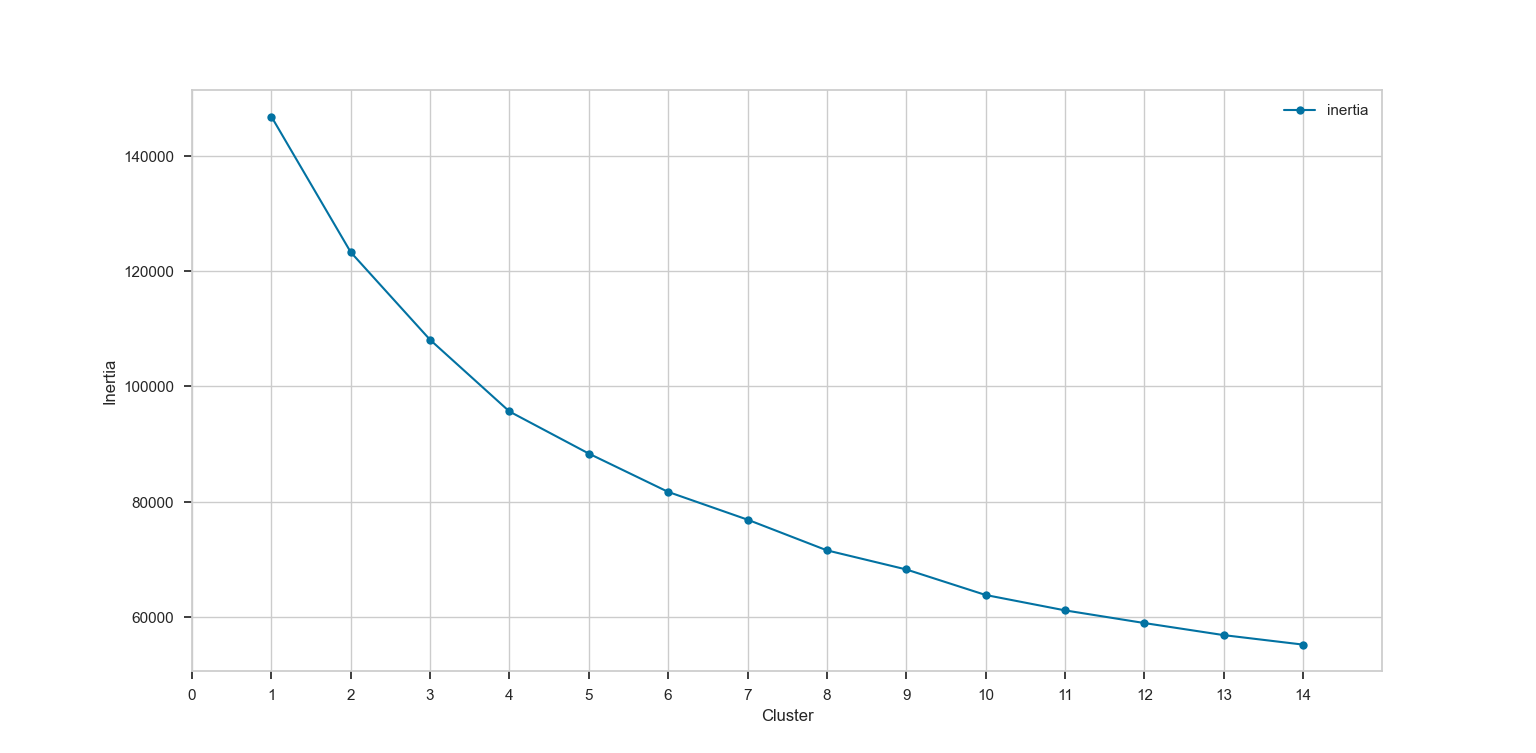

In [59]:
#K-Means

'''
from sklearn.cluster import KMeans

# Create an instance of the class
km=KMeans(n_clusters=4, random_state=42, init='k-means++')
km=km.fit(cc_scaled)
km
'''

"\nfrom sklearn.cluster import KMeans\n\n# Create an instance of the class\nkm=KMeans(n_clusters=4, random_state=42, init='k-means++')\nkm=km.fit(cc_scaled)\nkm\n"

In [184]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(cc_scaled)
labels=kmeans.labels_
print(labels.shape)

(8636,)


In [185]:
kmeans.cluster_centers_.shape

(3, 17)

In [186]:
cluster_centers_=pd.DataFrame(data=kmeans.cluster_centers_,columns=[cc_df.columns])
cluster_centers_

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.370199,-0.170789,-0.233441,-0.204523,-0.175950,-0.312412,-0.059302,-0.233495,-0.047903,-0.336519,-0.301404,-0.244989,-0.343228,-0.287782,-0.139690,0.015895,-0.025388
1,0.303323,0.419872,1.511683,1.263717,1.251221,-0.249094,1.133379,1.539164,0.957351,-0.364497,-0.254601,1.667687,0.888947,0.824408,0.157942,0.472298,0.295338
2,1.150492,0.314297,-0.295605,-0.212046,-0.309284,1.361478,-0.654581,-0.316653,-0.561103,1.540912,1.324550,-0.373039,0.596717,0.439181,0.400494,-0.424699,-0.133401


In [187]:
cluster_centers_=scaler.inverse_transform(cluster_centers_)
cluster_centers_=pd.DataFrame(data=cluster_centers_,co
                              lumns=[cc_df.columns])
cluster_centers_

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,825.492132,0.859565,519.571285,260.442347,259.463972,331.445250,0.472205,0.135852,0.349751,0.069702,1.230585,8.864653,3266.209863,947.135011,532.901337,0.164012,11.501109
1,2236.823143,0.982236,4301.224269,2733.266623,1568.453105,465.763191,0.950768,0.667714,0.749913,0.064056,1.554088,57.023947,7774.772915,4183.209240,1239.012170,0.299224,11.921552
2,4012.022317,0.960310,384.863467,247.772178,137.170262,3882.326227,0.233350,0.110901,0.145462,0.448529,12.469349,5.640485,6705.494601,3062.338726,1814.447520,0.033485,11.359515


In [188]:
y_kmeans=kmeans.fit_predict(cc_scaled)
print(y_kmeans)
print(y_kmeans.shape)
print(cc_df.shape)

[0 2 0 ... 0 0 0]
(8636,)
(8636, 17)


In [189]:
# Concatenate the clusters labels to our original dataframe
cc_df_cluster=pd.concat([cc_df,pd.DataFrame({'cluster':labels})],axis=1)
cc_df_cluster.tail(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8938,78.818407,0.500000,0.00,0.00,0.00,1113.186078,0.000000,0.000000,0.000000,0.166667,7.0,0.0,1200.0,1397.770131,21.821194,0.333333,6.0,NaN
8939,728.352548,1.000000,734.40,734.40,0.00,239.891038,0.333333,0.333333,0.000000,0.166667,2.0,2.0,1000.0,72.530037,110.950798,0.000000,6.0,NaN
8940,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,475.523262,82.771320,1.000000,6.0,NaN
8941,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13.0,5.0,9000.0,966.202912,861.949906,0.000000,6.0,NaN
8942,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,94.488828,86.283101,0.250000,6.0,NaN
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,1.0,500.0,58.644883,43.473717,0.000000,6.0,NaN
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0,NaN
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0,NaN
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0,NaN
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2.0,23.0,1200.0,63.165404,88.288956,0.000000,6.0,NaN


In [190]:
print(cc_df_cluster.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8933 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   float64
 11  PURCHASES_TRX                     8636 non-null   float64
 12  CREDIT

In [191]:
# Plot the histograms of various clusters
for i in cc_df.columns:
    plt.figure(figsize=(20,5))
    for j in range(5):
        plt.subplot(1,5,j+1)
        cluster=cc_df_cluster[cc_df_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{} \nCluster {}'.format(i,j))
plt.show()

# PyCaret

In [36]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [38]:
setup=setup(cc_df,
            session_id=42,
            normalize=True,
            transformation=True
           )

,Description,Value
0,session_id,42
1,Original Data,"(8636, 17)"
2,Missing Values,False
3,Numeric Features,16
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(8636, 23)"
9,CPU Jobs,-1


# KMeans by PyCaret

In [39]:
kmeans=create_model('kmeans',num_clusters=5)
print(kmeans)
evaluate_model(kmeans)

'''
Elbow=clusters=5
'''

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2117,2318.6632,1.5635,0,0,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=42, tol=0.0001, verbose=0)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

'\nElbow=clusters=5\n'

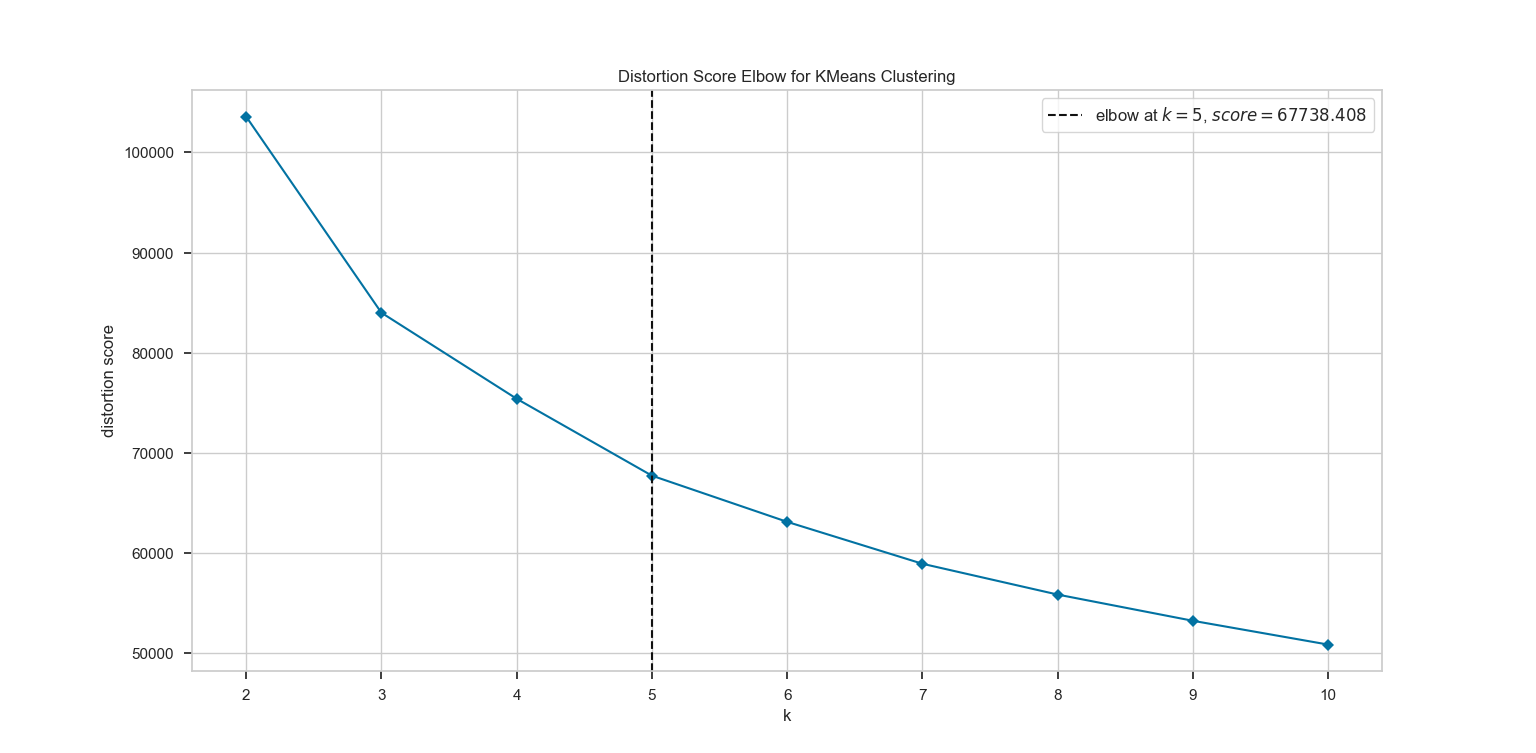

In [40]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,Cluster 2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Cluster 1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,Cluster 0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,Cluster 2
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,Cluster 3


In [41]:
kmean_results.groupby('Cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
Cluster 0,1486.096555,0.967172,3185.231991,2131.826456,1053.806895,39.771338,0.874500,0.614033,0.600238,0.012319,0.173160,40.590600,6477.459380,2992.819567,758.851614,0.280647,11.844774
Cluster 1,2565.579410,0.938385,58.932877,47.080151,11.897873,2326.008699,0.052821,0.029668,0.021101,0.315600,7.633659,0.777087,4566.239437,1893.006674,1161.310982,0.032863,11.401865
Cluster 2,566.188313,0.744046,315.916783,277.108033,39.086433,116.982371,0.224797,0.150947,0.072364,0.035823,0.503233,3.733836,3218.604852,739.308198,379.717265,0.107118,11.490841
Cluster 3,389.640926,0.882298,622.207699,36.504575,586.298452,45.033808,0.821862,0.031891,0.774547,0.013582,0.214402,14.396318,3008.811313,762.678861,605.833084,0.328918,11.438008
Cluster 4,3643.762137,0.979144,1726.363534,1023.500451,703.164784,2803.497414,0.766196,0.356640,0.565913,0.344105,9.227444,27.182331,6357.659774,3315.308951,1689.918370,0.039108,11.586466


# K-Means clustering

In [170]:
# KMeans clustering

# https://scikit-learn.org/stable/modules/clustering.html?highlight=estimate_bandwidth#clustering-performance-evaluation

from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, random_state=42).fit(cc_scaled)
labels = kmeans_model.labels_

# 2.3.10.5. Silhouette Coefficient
silhouette_score=metrics.silhouette_score(cc_scaled, labels, metric='euclidean')
print('silhouette_score (euclidean) is ' + str(silhouette_score))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html?highlight=metrics%20pairwise%20pairwise_distances
silhouette_score=metrics.silhouette_score(cc_scaled, labels, metric='manhattan')
print('silhouette_score (manhattan) is ' + str(silhouette_score))
silhouette_score=metrics.silhouette_score(cc_scaled, labels, metric='cosine')
print('silhouette_score (cosine) is ' + str(silhouette_score))

# 2.3.10.6. Calinski-Harabasz Index
calinski_harabasz_score=metrics.calinski_harabasz_score(cc_scaled, labels)
print('calinski_harabasz_score is ' + str(calinski_harabasz_score))

# 2.3.10.7. Davies-Bouldin Index¶
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score=davies_bouldin_score(cc_scaled, labels)
print('davies_bouldin_score is ' + str(davies_bouldin_score))

silhouette_score (euclidean) is 0.2089232822022867
silhouette_score (manhattan) is 0.27791528295455725
silhouette_score (cosine) is 0.35836469400290805
calinski_harabasz_score is 1647.9307017211006
davies_bouldin_score is 1.9117138517541643


In [43]:
'''
Number of cluster:

(2)
silhouette_score (euclidean) is 0.2089232822022867
silhouette_score (manhattan) is 0.27791528295455725
silhouette_score (cosine) is 0.35836469400290805
calinski_harabasz_score is 1647.9307017211006
davies_bouldin_score is 1.9117138517541643

(3)
silhouette_score (euclidean) is 0.24744546068984213
silhouette_score (manhattan) is 0.28389406670022094
silhouette_score (cosine) is 0.18154159736726347
calinski_harabasz_score is 1546.5339737117583
davies_bouldin_score is 1.6046945467287406

(4)
silhouette_score (euclidean) is 0.1970448976486613
silhouette_score (manhattan) is 0.24289304190029198
silhouette_score (cosine) is 0.2227143790262956
calinski_harabasz_score is 1539.2072466095894
davies_bouldin_score is 1.5767257139711564

(5)
silhouette_score (euclidean) is 0.19242183082705916
silhouette_score (manhattan) is 0.23030632425074232
silhouette_score (cosine) is 0.2406598404613014
calinski_harabasz_score is 1427.9357293121654
davies_bouldin_score is 1.553724434043694
'''

'\nNumber of cluster:\n\n(3)\nsilhouette_score (euclidean) is 0.24744546068984213\nsilhouette_score (manhattan) is 0.28389406670022094\nsilhouette_score (cosine) is 0.18154159736726347\ncalinski_harabasz_score is 1546.5339737117583\ndavies_bouldin_score is 1.6046945467287406\n\n(4)\nsilhouette_score (euclidean) is 0.1970448976486613\nsilhouette_score (manhattan) is 0.24289304190029198\nsilhouette_score (cosine) is 0.2227143790262956\ncalinski_harabasz_score is 1539.2072466095894\ndavies_bouldin_score is 1.5767257139711564\n\n(5)\nsilhouette_score (euclidean) is 0.19242183082705916\nsilhouette_score (manhattan) is 0.23030632425074232\nsilhouette_score (cosine) is 0.2406598404613014\ncalinski_harabasz_score is 1427.9357293121654\ndavies_bouldin_score is 1.553724434043694\n'

In [47]:
'''
for columns in cc_scaled:
    print(columns,"--> # of missing value", cc_scaled[columns].isna().sum() )
'''
'''
---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
~\AppData\Local\Temp\ipykernel_20172\4110523446.py in <module>
      1 for columns in cc_scaled:
----> 2     print(columns,"--> # of missing value", cc_scaled[columns].isna().sum() )

IndexError: arrays used as indices must be of integer (or boolean) type
'''

'\n---------------------------------------------------------------------------\nIndexError                                Traceback (most recent call last)\n~\\AppData\\Local\\Temp\\ipykernel_20172ĉ0523446.py in <module>\n      1 for columns in cc_scaled:\n----> 2     print(columns,"--> # of missing value", cc_scaled[columns].isna().sum() )\n\nIndexError: arrays used as indices must be of integer (or boolean) type\n'

# Kmeans - Kaggle example

In [48]:
# https://www.kaggle.com/code/pnarerdoan/k-means-dbscan-clustering/notebook

from sklearn.cluster import KMeans

# Plot within-cluster sum of square.

wss = []

K = range(2,20)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans = kmeans.fit(cc_scaled)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

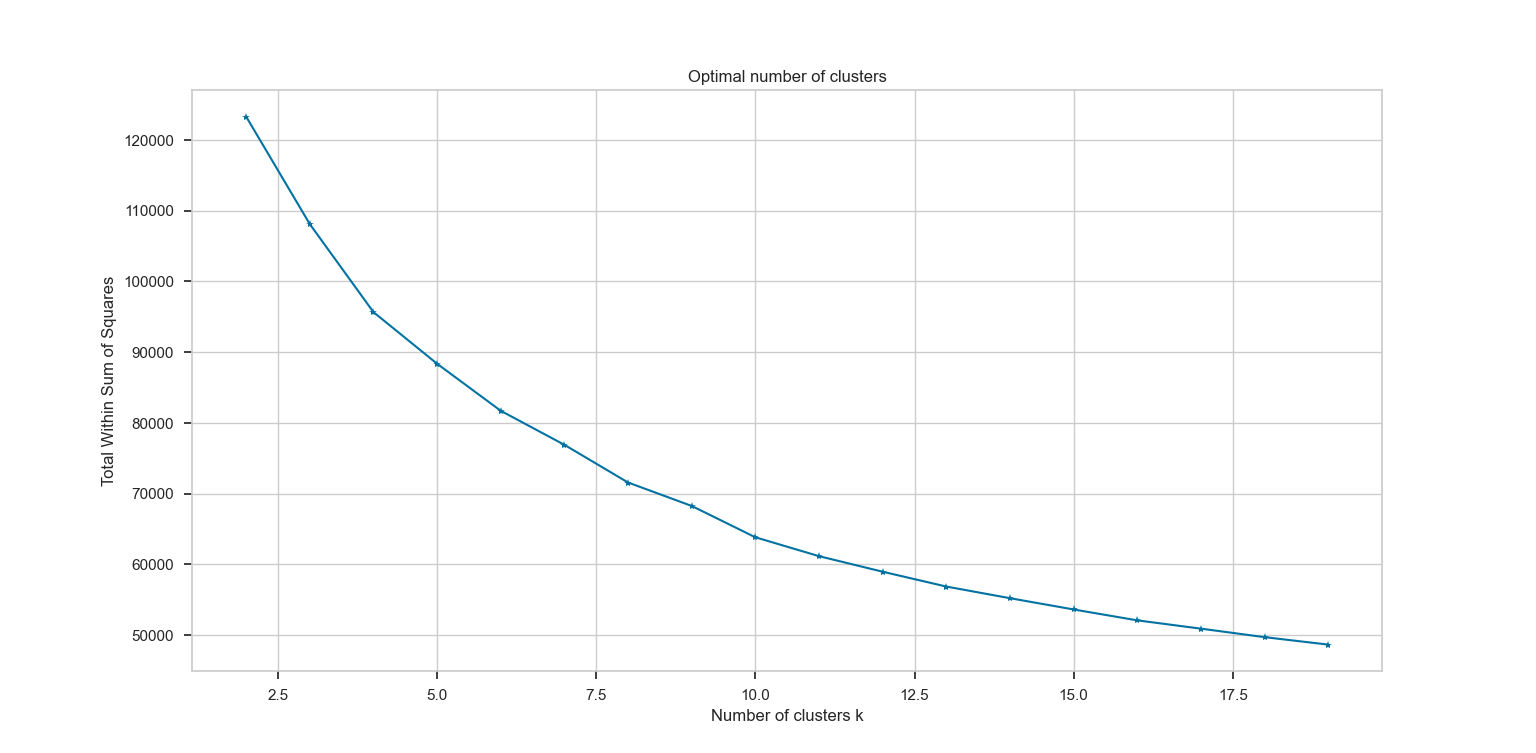

In [49]:
from sklearn import metrics
def find_optimal_cluster_number_kmeans(data, lower_bound, upper_bound, random_state):
    
    "Find optimal number of cluster according to silhouette score."
    
    silhouette_average = []
    K = range(lower_bound, upper_bound)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        cluster_labels=kmeans.fit_predict(cc_scaled) 
        silhouette_score = metrics.silhouette_score(data, cluster_labels)
        silhouette_average.append([k, silhouette_score])
        
    silhouette_average = np.array(silhouette_average)
    print("n_clusters =", int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0]),
          "The average silhouette_score is : %.4f" % silhouette_average[np.argmax(silhouette_average[:,1:2])][1])

In [50]:
find_optimal_cluster_number_kmeans(cc_scaled, 2, 20, random_state=42)

'''
n_clusters = 3 The average silhouette_score is : 0.2474
'''

n_clusters = 3 The average silhouette_score is : 0.2474


'\nn_clusters = 3 The average silhouette_score is : 0.2474\n'

In [176]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil = []
# Number of clusters in range 2-10
K = range(2, 10)
for n in K:
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(cc_scaled)
    labels = algorithm.labels_
    sil.append(silhouette_score(cc_scaled, labels, metric = 'euclidean'))
    print(n,sil)
    


2 [0.2089710860525109]
3 [0.2089710860525109, 0.24693706376967564]
4 [0.2089710860525109, 0.24693706376967564, 0.1970448976486613]
5 [0.2089710860525109, 0.24693706376967564, 0.1970448976486613, 0.1922483658488757]
6 [0.2089710860525109, 0.24693706376967564, 0.1970448976486613, 0.1922483658488757, 0.20673965627029522]
7 [0.2089710860525109, 0.24693706376967564, 0.1970448976486613, 0.1922483658488757, 0.20673965627029522, 0.21965770445379837]
8 [0.2089710860525109, 0.24693706376967564, 0.1970448976486613, 0.1922483658488757, 0.20673965627029522, 0.21965770445379837, 0.2277043387861168]
9 [0.2089710860525109, 0.24693706376967564, 0.1970448976486613, 0.1922483658488757, 0.20673965627029522, 0.21965770445379837, 0.2277043387861168, 0.22063531176492635]


In [178]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans


db = []
K = range(2, 10)
for n in K:
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(cc_scaled)
    labels = algorithm.labels_
    db.append(davies_bouldin_score(cc_scaled,labels))
    print(n,db)

2 [1.9114646415408718]
3 [1.9114646415408718, 1.6061253730724525]
4 [1.9114646415408718, 1.6061253730724525, 1.5767257139711564]
5 [1.9114646415408718, 1.6061253730724525, 1.5767257139711564, 1.553802473603227]
6 [1.9114646415408718, 1.6061253730724525, 1.5767257139711564, 1.553802473603227, 1.4914047077349133]
7 [1.9114646415408718, 1.6061253730724525, 1.5767257139711564, 1.553802473603227, 1.4914047077349133, 1.3879641468437522]
8 [1.9114646415408718, 1.6061253730724525, 1.5767257139711564, 1.553802473603227, 1.4914047077349133, 1.3879641468437522, 1.3774993673046232]
9 [1.9114646415408718, 1.6061253730724525, 1.5767257139711564, 1.553802473603227, 1.4914047077349133, 1.3879641468437522, 1.3774993673046232, 1.3015041387455282]


In [182]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

'''
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

'''

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(cc_df) + (cc_df + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(cc_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(cc_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        cc_df[:, 0], cc_df[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().